# Overview Business Understanding

Many of us in our working age often overlook the importance of maintaining a healthy lifestyle. However, sleep plays a crucial role in our overall health and well-being. Factors such as a balanced diet, regular exercise, and managing stress levels can significantly enhance the quality of our sleep, which is essential for maintaining heart health.
But how much sleep do we actually need? According to the Centers for
 Disease Control and Prevention in Atlanta, adults aged 18 to 65
should aim for at least seven hours of high-quality sleep each
night. Unfortunately, it's evident that a large portion of the
population isn't meeting this recommendation.


in fact, research from the National Heart, Lung, and Blood Institute of the National Institutes of Health reveals that between 50 to 70 million American adults struggle with irregular sleep patterns or suffer from sleep disorders such as insomnia and sleep apnea. This highlights a widespread issue in our society.

# Dataset



## `Sleep Health and Lifestyle Dataset`

https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset/data

# Business Goals

1. Identify the factors that influence sleep health and lifestyle to detect signs of sleep disorders.

2. Predict the likelihood of individuals experiencing sleep disorders based on their sleep health and lifestyle information.

3. This approach presents a promising method for identifying and addressing sleep-related issues, particularly within the healthcare sector.

4. By reducing the prevalence of sleep disorders by around 40% compared to the previous year, we can significantly enhance overall health outcomes, especially within America's National Health Service.


# Metadata:

1.	Person ID: An identifier for each individual.
2.	Gender: The gender of the person (Male/Female).
3.	Age: The age of the person in years.
4.	Occupation: The occupation or profession of the person.
5.	Sleep Duration (hours): The number of hours the person sleeps per day.
6.	Quality of Sleep (scale: 1-10): A subjective rating of the quality of sleep, ranging from 1 to 10.
7.	Physical Activity Level (minutes/day): The number of minutes the person engages in physical activity daily.
8.	Stress Level (scale: 1-10): A subjective rating of the stress level experienced by the person, ranging from 1 to 10.
9.	BMI Category: The BMI category of the person (e.g., Underweight, Normal, Overweight).
10.	Blood Pressure (systolic/diastolic): The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.
11.	Heart Rate (bpm): The resting heart rate of the person in beats per minute.
12.	Daily Steps: The number of steps the person takes per day.
13.	Sleep Disorder: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).

Target: Sleep Disorder


In [375]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [376]:
!pip install feature-engine

In [377]:
pip install xgboost

In [378]:
#Pandas Config
import pandas as pd
pd.set_option("display.max_columns",None)

#Numpy Config
import numpy as np

#Fixings warnings
import warnings
warnings.filterwarnings('ignore')

#Visualisation
import seaborn as sns
import plotly.express as px
from termcolor import colored
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.figure_factory as ff

#Preprocessing
# for Q-Q plots
import scipy.stats as stats
from feature_engine.outliers import Winsorizer
from scipy.stats import chi2_contingency





In [379]:
#Modeling
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate, StratifiedKFold, RandomizedSearchCV, cross_val_score
from sklearn import svm,tree
from sklearn import ensemble
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split as tts
from sklearn import model_selection
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import mean_squared_error, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.multiclass import OneVsOneClassifier

# Function
def missing_check(data):
    if isinstance(data, pd.Series):
        data = pd.DataFrame(data)
    missing = data.isnull().sum()
    percentage = round((missing / len(data)) * 100, 2)
    unique_val = data.nunique()
    type_data = data.dtypes
    result = pd.DataFrame({
        'Missing_values': missing,
        'Percent of Missing (%)': percentage,
        'Numbers of Unique': unique_val,
        'Data type': type_data
    })
    return result


In [380]:
data = pd.read_csv('/content/drive/MyDrive/Finpro_Anastasia Talia Dwimantari/Sleep_health_and_lifestyle_dataset.csv')


data.head().style.set_properties(**{'background-color': '#98FB98', 'color': '#333333'})

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.100000,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.200000,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.200000,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.900000,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.900000,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [381]:
data.shape

(374, 13)

Observations:
1. There are 5 columns with object data types: `Gender`, `Occupation`, `BMI Category`, `Blood Category` and `Sleep Disorder`.
2. Sleep Disorders seem to have non-binary values.
3. There are no apparent defects in the data regarding column names versus entries; everything appears to be in order. However, some adjustments may be necessary for better data processing.

## General Information & Missing Values

In [382]:
#check missing values,data type, dan numbers of unique value
missing_check(data)

,Missing_values,Percent of Missing (%),Numbers of Unique,Data type
Person ID,0,0.0,374,int64
Gender,0,0.0,2,object
Age,0,0.0,31,int64
Occupation,0,0.0,11,object
Sleep Duration,0,0.0,27,float64
Quality of Sleep,0,0.0,6,int64
Physical Activity Level,0,0.0,16,int64
Stress Level,0,0.0,6,int64
BMI Category,0,0.0,4,object
Blood Pressure,0,0.0,25,object


No missing values!


## Duplicated data check

In [383]:
# number of duplicated data
data.duplicated().sum()

0

No duplicates!! Good!!

# Data understanding

## Statistical summary

In [384]:
# group column names based on type
# it will make our life easier onwards
categoricals = ['Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder']

numericals = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level','Stress Level','Heart Rate','Daily Steps']

In [385]:
# numerical statistical sumary
data[numericals].describe().style.background_gradient(cmap='BuPu') #for colored output


,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


Considering the distribution of all numerical variables, they exhibit a positive skew toward the right

In [386]:
# value counts discrete columns
for col in numericals:
  print(f"Value counts of {col} column")
  print(data[col].value_counts(), '\n')

Value counts of Age column
43    34
44    30
37    20
38    20
50    20
31    18
32    17
53    17
59    16
39    15
45    14
33    13
30    13
29    13
35    12
36    12
41    12
49    11
57     9
52     9
42     9
51     8
54     7
58     6
28     5
40     4
48     3
55     2
56     2
34     2
27     1
Name: Age, dtype: int64 

Value counts of Sleep Duration column
7.2    36
6.0    31
7.8    28
6.5    26
6.1    25
7.7    24
6.6    20
7.1    19
8.1    15
7.3    14
8.4    14
6.3    13
8.5    13
8.0    13
6.2    12
8.2    11
7.6    10
6.4     9
7.9     7
7.4     5
6.7     5
7.5     5
6.8     5
8.3     5
5.9     4
6.9     3
5.8     2
Name: Sleep Duration, dtype: int64 

Value counts of Quality of Sleep column
8    109
6    105
7     77
9     71
5      7
4      5
Name: Quality of Sleep, dtype: int64 

Value counts of Physical Activity Level column
60    70
30    68
45    68
75    67
90    67
40     6
55     6
35     4
50     4
70     3
42     2
32     2
80     2
65     2
85     2
47     1

Observation:
* Overall, the minimum and maximum values make sense for each column
*`Age`, `Sleep Duration`, `Quality of Sleep`, `Physical Activity Level`,`Stress Level`,`Heart Rate` and `Daily Steps` are discrete values with any unique values, need to conclude its simmetricity either.
* Mean != 50% (Median) in `Sleep Duration`, `Quality of Sleep`, `Physical Activity Level`,`Stress Level`,`Heart Rate` and `Daily Steps`column, shows a positive direction distribution

In [387]:
# categorical statistical sumary
data[categoricals].describe(include='O').style.set_properties(**{'background-color': '#808080', 'color': '#E2EEF3'})

,Gender,Occupation,BMI Category,Blood Pressure,Sleep Disorder
count,374,374,374,374,374
unique,2,11,4,25,3
top,Male,Nurse,Normal,130/85,None
freq,189,73,195,99,219


In [388]:
# showing the precise value counts
# this code is especially useful if we have many categorical columns
for col in categoricals:
  print(f"Value counts of {col} column")
  print(data[col].value_counts(), '\n')

Value counts of Gender column
Male      189
Female    185
Name: Gender, dtype: int64 

Value counts of Occupation column
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: Occupation, dtype: int64 

Value counts of BMI Category column
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: BMI Category, dtype: int64 

Value counts of Blood Pressure column
130/85    99
140/95    65
125/80    65
120/80    45
115/75    32
135/90    27
140/90     4
125/82     4
132/87     3
128/85     3
126/83     2
115/78     2
139/91     2
142/92     2
119/77     2
135/88     2
129/84     2
128/84     2
131/86     2
117/76     2
130/86     2
118/75     2
121/79     1
122/80     1
118/76     1
Name: Blood Pressure, dtype: in

In [389]:
# change Normal Weight to be Normal
data['BMI Category']=data['BMI Category'].replace({'Normal Weight':'Normal'})

In [390]:
BMI_Category_count=data['BMI Category'].value_counts().reset_index()
BMI_Category_count

,index,BMI Category
0,Normal,216
1,Overweight,148
2,Obese,10


Observations:
* `Gender` has 2 unique values: 'Male' and 'Female'.
* `Job` has 11 unique values: 'Nurse', 'Doctor', 'Engineer', 'Lawyer', 'Teacher', 'Accountant', 'Salesperson', 'Software Engineer', 'Scientist', 'Sales Representative', and 'Manager'.
* `BMI Category` has 3 unique values: 'Normal', 'Overweight', and 'Obesity'.
* `Blood Pressure` has 25 unique values and the most is 130/85.
* `Sleep Disorders` has 3 unique values: 'None', 'Sleep Apnea', and 'Insomnia'.
* From the categorical data, the following can be observed:
1. While there are more male individuals, the difference compared to females is not very significant, with only a discrepancy of 4 individuals.
2. There are more individuals in nursing jobs, but the difference is not significantly greater than other professions.
3. More individuals fall into the BMI category 'Normal', but the difference is not significantly greater than other BMI categories.
4. More individuals do not have sleep disorders, but the difference is not significantly greater than those who do have sleep disorders.
* In terms of the target variable, `Sleep Disorder = None` (any specific sleep disorder) is more frequent in the dataset. But, the imbalance condition is NOT severe (still OK)

In [391]:
data.nunique()

Person ID                  374
Gender                       2
Age                         31
Occupation                  11
Sleep Duration              27
Quality of Sleep             6
Physical Activity Level     16
Stress Level                 6
BMI Category                 3
Blood Pressure              25
Heart Rate                  19
Daily Steps                 20
Sleep Disorder               3
dtype: int64

# Univariate Analysis

## Boxplot to detect outliers

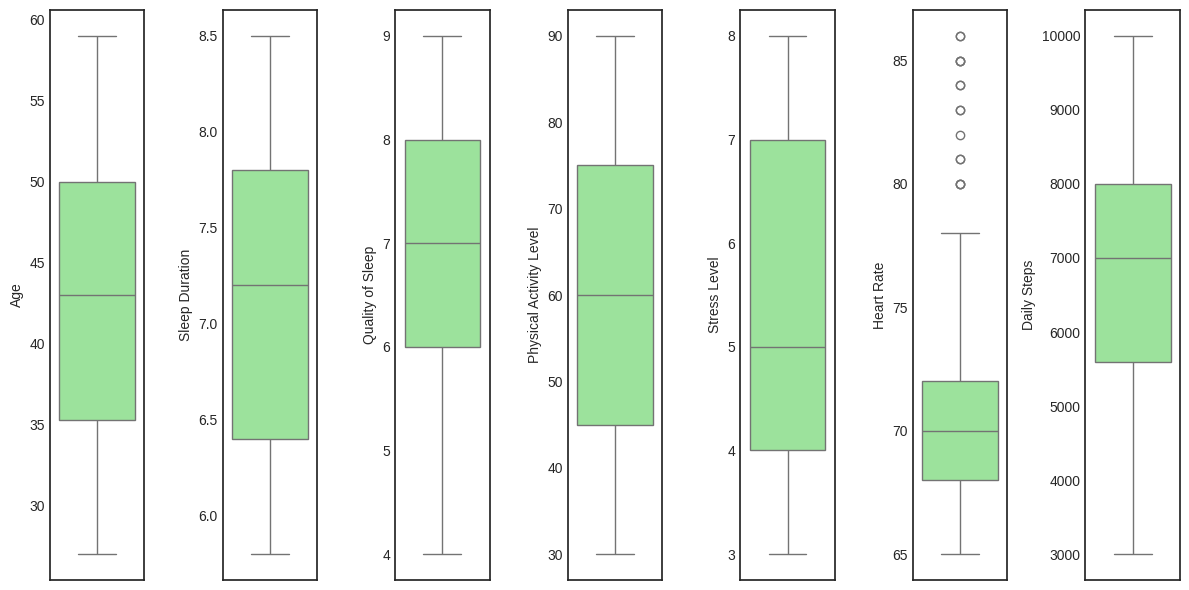

In [392]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

# plotting
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=data[features[i]], color='lightgreen')
    plt.tight_layout()

In [393]:
# check the outlier full profile
outlier_threshold = 78
outlier_data = data[data['Heart Rate'] > outlier_threshold]
outlier_data

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
16,17,Female,29,Nurse,6.5,5,40,7,Normal,132/87,80,4000,Sleep Apnea
18,19,Female,29,Nurse,6.5,5,40,7,Normal,132/87,80,4000,Insomnia
80,81,Female,34,Scientist,5.8,4,32,8,Overweight,131/86,81,5200,Sleep Apnea
81,82,Female,34,Scientist,5.8,4,32,8,Overweight,131/86,81,5200,Sleep Apnea
93,94,Male,35,Lawyer,7.4,7,60,5,Obese,135/88,84,3300,Sleep Apnea
145,146,Female,38,Lawyer,7.4,7,60,5,Obese,135/88,84,3300,Sleep Apnea


Obervation:
1. There is 15 outlier in the `Heart Rate` column (value = 80-86)
2. But the value is still reasonable (NOT that extreme), hence no need to handle speficically

## KDE plot for knowing the distribution form

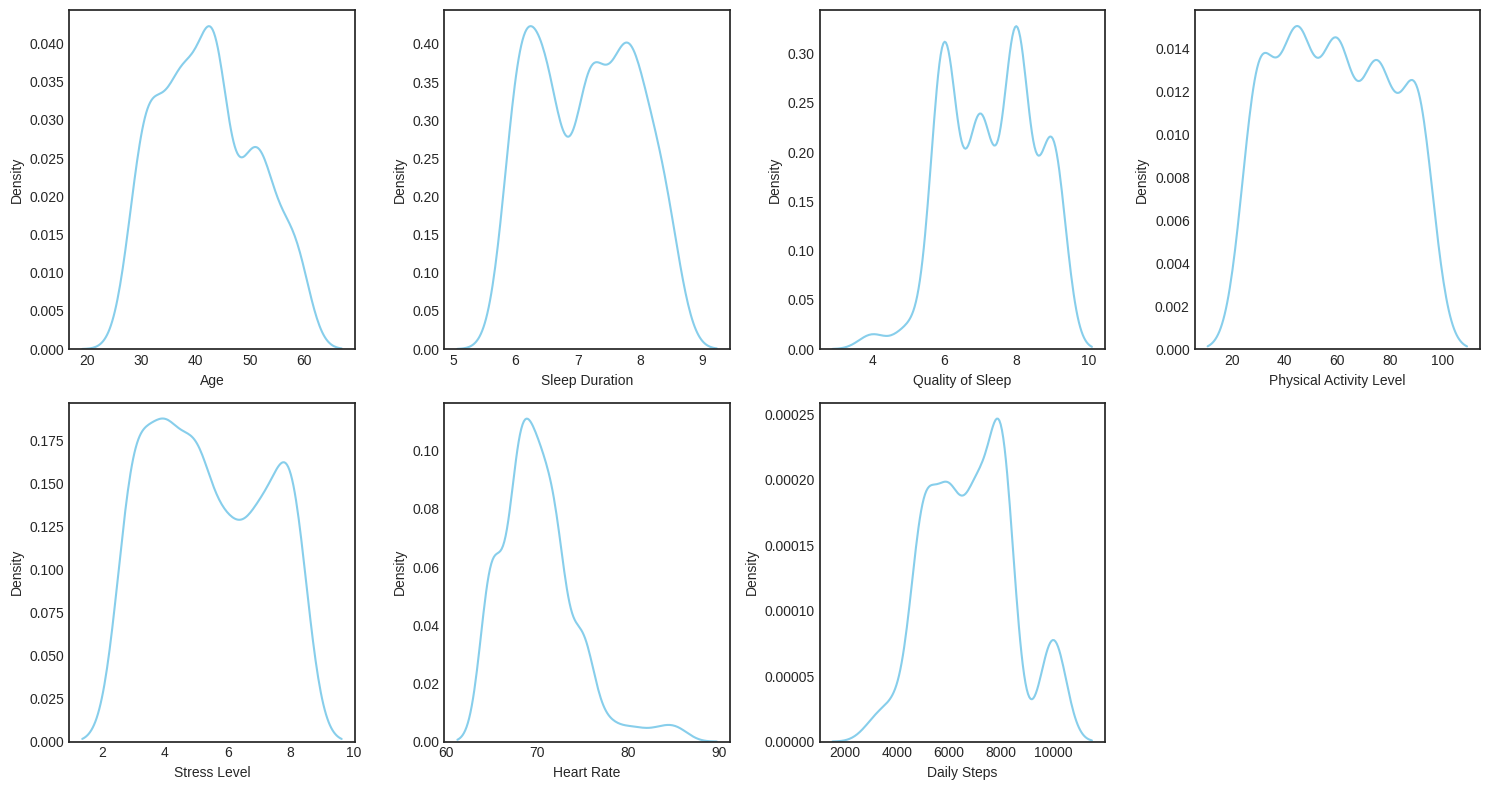

In [394]:
# adjust the figure size for better readability
plt.figure(figsize=(15,8))

features = numericals
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    sns.kdeplot(x=data[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

Observations:
1. The true continuous numeric features, represented by all columns in the 'numericals' set, exhibit a certain level of symmetry, which is favorable. This suggests that there may be no need to transform them to approximate a normal distribution if we intend to use them for modeling purposes later on.

2. Most dataset peaks are as follows:
- Age: 42
- Sleep duration: between 6.1-6.2 hours
- Quality of sleep: scale of 8.5
- Physical activity level: 48 minutes per day
- Stress level: scale of 3.4
- Heart rate: 67 beats per minute
- Daily step count: 7900 steps per day


# Bivariate Analysis

In [395]:
# remember the dataset
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


# ANOVA = One Way

In [396]:
data['Sleep Disorder'].value_counts(normalize=True)

None           0.585561
Sleep Apnea    0.208556
Insomnia       0.205882
Name: Sleep Disorder, dtype: float64

In [397]:
#correlation between Sleep Disorders (None, Sleep Apnea and Insomnia)
#Ho : None=Sleep Apnea = Insomnia
#H1 : None =! Sleep Apnea =! Insomnia (at least 1 different group)

from scipy.stats import f_oneway

In [398]:
data['Sleep Disorder'].columns = ['None','Sleep Apnea','Insomnia']
data['Sleep Disorder']

0             None
1             None
2             None
3      Sleep Apnea
4      Sleep Apnea
          ...     
369    Sleep Apnea
370    Sleep Apnea
371    Sleep Apnea
372    Sleep Apnea
373    Sleep Apnea
Name: Sleep Disorder, Length: 374, dtype: object

In [399]:
data_anova = data['Sleep Disorder']
data_anova

0             None
1             None
2             None
3      Sleep Apnea
4      Sleep Apnea
          ...     
369    Sleep Apnea
370    Sleep Apnea
371    Sleep Apnea
372    Sleep Apnea
373    Sleep Apnea
Name: Sleep Disorder, Length: 374, dtype: object

In [400]:
data_anova.describe()

count      374
unique       3
top       None
freq       219
Name: Sleep Disorder, dtype: object

In [401]:
# Select data for each group
g1 = data_anova[data_anova == 'None'].index
g2 = data_anova[data_anova == 'Sleep Apnea'].index
g3 = data_anova[data_anova == 'Insomnia'].index

# Perform ANOVA test
f_oneway(g1, g2, g3)

F_onewayResult(statistic=54.65343896232175, pvalue=1.574424259747881e-21)

The p value of 1.574 indicates that Ho is rejected, that is, there is a difference in at least one of the Sleep Disorder groups.

# Eksplonatory Data Analysis:

# How does Sleep Disorder by Gender compare?

<Axes: xlabel='Gender', ylabel='count'>

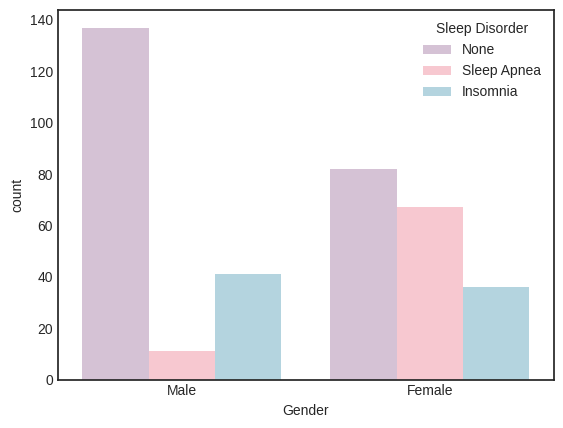

In [402]:
custom_palette = {'Insomnia': '#ADD8E6', 'None': '#D8BFD8', 'Sleep Apnea': '#FFC0CB'}

# Plot countplot with custom color palette
sns.countplot(data=data,
              x='Gender',
              hue='Sleep Disorder',
              palette=custom_palette
              )


The observation reveals that both males and females experience sleep disorders, with the majority categorized as "None," indicating the absence of specific sleep disorders. However, among males, insomnia is the second most prevalent sleep disorder, whereas among females, sleep apnea is the second most common. This presents an intriguing contrast between the prevalence of sleep disorders among different genders.

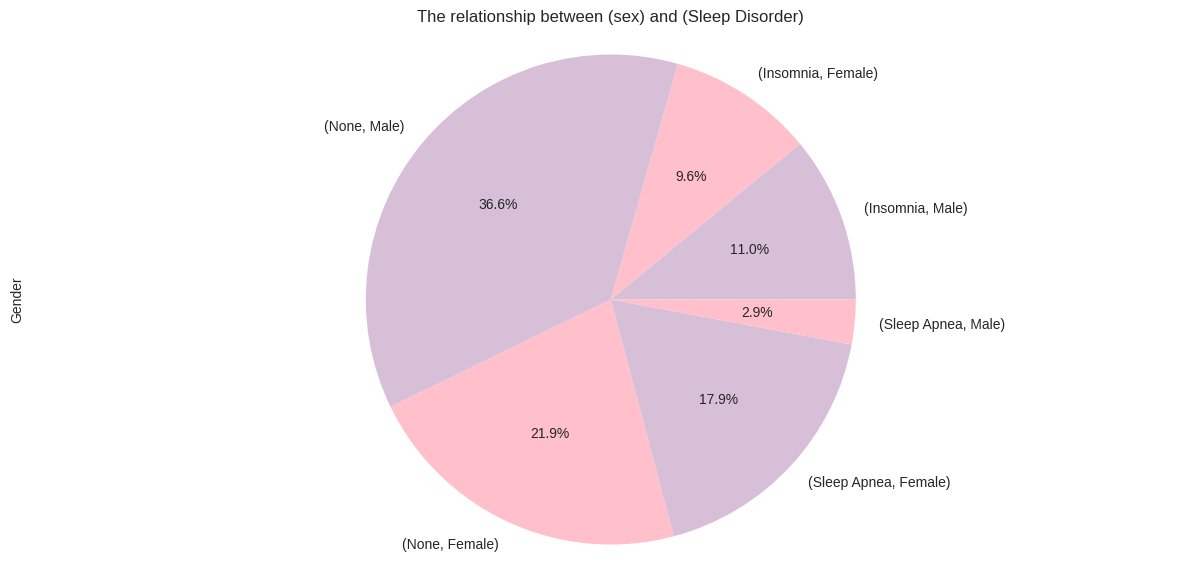

In [403]:
# The relationship between (sex) and (Sleep Disorder)
data.groupby('Sleep Disorder')['Gender'].value_counts().plot.pie(autopct ='%1.1f%%',figsize=(15,7),
                                                                 colors=['#D8BFD8','pink','#D8BFD8','pink','#D8BFD8','pink'])
plt.title('The relationship between (sex) and (Sleep Disorder)')
plt.axis('equal')
plt.show()

Female individuals experience a significantly higher prevalence of sleep apnea, with a 17.9% higher incidence compared to Male individuals. On the other hand, Male individuals tend to have a higher prevalence of insomnia by 11%, although this difference is not statistically significant compared to Female individuals. Therefore, it can be concluded that Female individuals are more vulnerable to experiencing sleep disorders, including both sleep apnea and insomnia.

# How occupation affects Sleep Disorder?

In [404]:
data.groupby(['Sleep Disorder','Gender'])['Occupation'].value_counts()

Sleep Disorder  Gender  Occupation          
Insomnia        Female  Teacher                 25
                        Accountant               7
                        Nurse                    3
                        Engineer                 1
                Male    Salesperson             29
                        Engineer                 4
                        Doctor                   3
                        Lawyer                   2
                        Teacher                  2
                        Software Engineer        1
None            Female  Engineer                31
                        Accountant              29
                        Nurse                    9
                        Teacher                  7
                        Doctor                   2
                        Scientist                2
                        Lawyer                   1
                        Manager                  1
                Male    Doctor       

In [405]:
# The Effect of Job on sleep
fig=px.treemap(data,path=[px.Constant('Jobs'),'Sleep Disorder','Occupation','Gender'],
               color='Sleep Disorder',
               color_continuous_scale='greens')

fig.update_layout(title='<b>The Effect of Job on sleep</b>..',
                 title_font={'size':20})

fig.show()

Observation:

1. It can be seen that the condition of insomnia is most often found in salesperson jobs, 29 people, and 25 people in teacher jobs.
2. It is known that the majority of Sleep Apnea sufferers work as nurses, numbering 61 people.
3. None were most often found in the type of work: Doctors with 62 people, Engineers with 57 people and Lawyers with 42 people.

### Stress level sleep disorder by occupation

In [406]:
data.pivot_table(
    index='Occupation',
    columns='Sleep Disorder',
    values='Stress Level',
    aggfunc='mean'
).style.background_gradient(cmap='coolwarm')

Sleep Disorder,Insomnia,None,Sleep Apnea
Occupation,,,
Accountant,6.571429,4.133333,nan
Doctor,6.000000,6.875000,5.000000
Engineer,5.400000,3.736842,5.000000
Lawyer,5.000000,5.071429,5.000000
Manager,nan,5.000000,nan
Nurse,7.333333,5.000000,5.540984
Sales Representative,nan,nan,8.000000
Salesperson,7.000000,7.000000,7.000000
Scientist,nan,6.000000,8.000000


Observation:
- People dealing with Insomnia tend to have average stress levels between 4.3 and 8. Among them, Software Engineers seem to face the highest stress levels.
- Those affected by Sleep Apnea generally report average stress levels ranging from 5 to 8. Interestingly, Scientists appear to experience the highest stress levels among them.
- Individuals who don't report any sleep disorders show average stress levels ranging from 3.7 to 7.

# How is the Quality of Sleep with Sleep Disorder?

In [407]:
data.pivot_table(
    index='Quality of Sleep',
    columns='Sleep Disorder',
    values='Sleep Duration',
    aggfunc='mean'
).style.background_gradient(cmap='BuPu')

Sleep Disorder,Insomnia,None,Sleep Apnea
Quality of Sleep,,,
4,5.900000,nan,5.850000
5,6.500000,nan,6.500000
6,6.371875,6.117500,6.118182
7,6.638235,7.540000,7.500000
8,7.520000,7.399010,7.366667
9,8.300000,8.365789,8.096875


The average sleep duration for individuals with Insomnia and Sleep Apnea ranges from 5.9 to 8.3 hours. Interestingly, there doesn't seem to be a significant difference between the two in terms of sleep quality.

In [408]:
# The Effect of Quality of Sleep on Sleep
fig=px.sunburst(data,path=[px.Constant('Sleep quality'),'Sleep Disorder','Quality of Sleep'],
               color='Sleep Disorder',
               values='Sleep Duration',
               color_discrete_sequence=['#D8BFD8','#ADD8E6','#FFC0CB'],
               hover_data=['Gender'])

fig.update_layout(title='<b>The effect of Quality of Sleep on Sleep </b>..',
                 title_font={'size':25})

fig.show()

Sleep Apnea has sleep quality that affects sleep duration more than Insomnia, although not significantly

#


In [409]:
# The Effect of Activities on Sleep
fig = px.violin(data, x="Sleep Disorder",y='Physical Activity Level',
                 color='Sleep Disorder',
                 color_discrete_sequence=['white','#D8BFD8','#ADD8E6'],
                 violinmode='overlay')


fig.update_layout(title='<b>The Effect of Activities on Sleep </b>..',
                 title_font={'size':25},
                 paper_bgcolor='#EBDEF0',
                 plot_bgcolor='#EBDEF0')

fig.update_yaxes(showgrid=False)
fig.show()

Individuals who engage in physical activity for 60-90 minutes per day tend to experience Sleep Apnea, while those who engage in physical activity for 45 minutes per day are more prone to Insomnia.

In [410]:
data.groupby(['Sleep Disorder','Physical Activity Level']).agg(
    distinct_id = ('Person ID','nunique')
).reset_index()

,Sleep Disorder,Physical Activity Level,distinct_id
0,Insomnia,30,5
1,Insomnia,35,2
2,Insomnia,40,3
3,Insomnia,45,59
4,Insomnia,60,2
5,Insomnia,65,2
6,Insomnia,90,4
7,None,30,60
8,None,40,2
9,None,42,2


# How does age relate to Sleep Disorder?

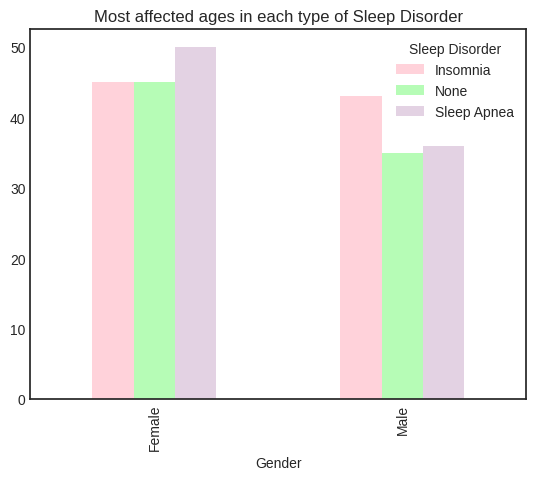

In [411]:
# Most affected ages in each type of Sleep Disorder
data.pivot_table(index='Gender',
                 columns='Sleep Disorder',
                 values='Age',
                 aggfunc='median'
).plot(kind='bar',
       color={'#98FB98', '#FFC0CB', '#D8BFD8'},
       title='Most affected ages in each type of Sleep Disorder',
       label='Age',alpha=.7)

plt.show()

Women aged 50 are prone to experiencing sleep apnea, while those aged 45 (under 50) may face insomnia.
In contrast, men aged 43 are more susceptible to insomnia, while those aged 35-36 are prone to sleep apnea.

In [412]:
# The Effect of Ages on Sleep
fig=px.ecdf(data,x='Age',
            color='Sleep Disorder',
            color_discrete_sequence=['white','#D8BFD8','#ADD8E6'])


fig.update_layout(title='<b>The Effect of Ages on Sleep </b>..',
                 title_font={'size':25},
                 paper_bgcolor='#EBDEF0',
                 plot_bgcolor='#EBDEF0')


fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

The possibility of sleep disorders, Insomnia is more common at ages over 44 years, and Sleep Apnea is more common at ages 50 years and over.

In [413]:
# The Effect of Activities on Sleep
fig = px.violin(data, x="Sleep Disorder",y='Heart Rate',
                 color='Sleep Disorder',
                 color_discrete_sequence=['white','#D8BFD8','#ADD8E6'],
                 violinmode='overlay')


fig.update_layout(title='<b>The Effect of Heart Rate on Sleep </b>..',
                 title_font={'size':25},
                 paper_bgcolor='#EBDEF0',
                 plot_bgcolor='#EBDEF0')

fig.update_yaxes(showgrid=False)
fig.show()

# How does Sleep Duration relate to Sleep Disorder?

In [414]:
# The effect of Sleep Duration on Sleep Disorder
fig=px.histogram(data,x='Sleep Disorder',y='Sleep Duration',
                 color='Sleep Disorder',color_discrete_sequence=['white','#D8BFD8','#ADD8E6'],
                 text_auto=True)

fig.update_layout(title='<b>The effect of Sleep Duration on Sleep Disorder</b> ..',
                  titlefont={'size': 24,'family': 'Serif'},
                  showlegend=True,
                  paper_bgcolor='#EBDEF0',
                  plot_bgcolor='#EBDEF0')

fig.update_yaxes(showgrid=False)

fig.show()

Sleep duration significantly influences the occurrence of Sleep Apnea and Insomnia. There is a notable difference between individuals reporting "None" for sleep duration, which averages 1611.5, and those experiencing Sleep Apnea, which averages 548.5, and Insomnia, which averages 507.4.

In [415]:
data.groupby(['Sleep Disorder','Sleep Duration']).agg(
    distinct_id = ('Person ID','nunique')
).reset_index()

,Sleep Disorder,Sleep Duration,distinct_id
0,Insomnia,5.9,1
1,Insomnia,6.0,1
2,Insomnia,6.1,1
3,Insomnia,6.3,13
4,Insomnia,6.4,7
5,Insomnia,6.5,23
6,Insomnia,6.6,17
7,Insomnia,6.7,3
8,Insomnia,6.8,3
9,Insomnia,7.2,2


# How is BMI Category, Blood Pressure and Heart Rate related to Sleep Disorder?

In [416]:
# The relationship between (BMI Category , Blood Pressure and Heart Rate) and their effect on  Sleep Disorder
fig=px.scatter_3d(data,x='BMI Category',y='Blood Pressure',z='Heart Rate',
                  color='Sleep Disorder',width=1000,height=900,
                  color_discrete_sequence=['white','#D8BFD8','#ADD8E6'])


fig.update_layout(title='<b>The relationship between (BMI Category , Blood Pressure and Heart Rate) and their effect on  Sleep Disorder</b> ..',
                  titlefont={'size': 20,'family': 'Serif'},
                  showlegend=True)



fig.show()

BMI category, heart rate, and blood pressure significantly influence sleep disorders such as Sleep Apnea and Insomnia. but each category is independent

# How is Stress Level related to Sleep Disorder?

In [417]:
# The effect of Stress Level on Sleep Disorder
data.pivot_table(
    index='Stress Level',
    columns='Sleep Disorder',
    aggfunc={'Sleep Disorder':'count'}
).style.background_gradient(cmap='BuPu')

In [418]:
import plotly.express as px

# Sort data by Stress Level
sorted_data = data.sort_values(by='Stress Level')

# The effect of Stress Level on Sleep Disorder
fig = px.histogram(sorted_data, x='Sleep Disorder',
                   color='Sleep Disorder',
                   facet_col='Stress Level',
                   barmode='group',
                   color_discrete_sequence=['#D8BFD8','white','#ADD8E6'],
                   opacity=.8)

fig.update_layout(title='<b>The effect of Stress Level on Sleep Disorder</b> ..', title_font={'size':30},
                  paper_bgcolor='#EBDEF0',
                  plot_bgcolor='#EBDEF0')

fig.update_yaxes(showgrid=False)
fig.show()


High stress levels (7-8) significantly contribute to the occurrence of insomnia and sleep apnea, while even moderate stress levels (3-4) can predispose individuals to experience these sleep disorders.

# How is BMI Category related to Sleep Disorder?

In [419]:
# The effect of BMI Category on Sleep Disorder
data.pivot_table(
    index='BMI Category',
    columns='Sleep Disorder',
    aggfunc={'Sleep Disorder':'count'}
).style.background_gradient(cmap='BuPu')

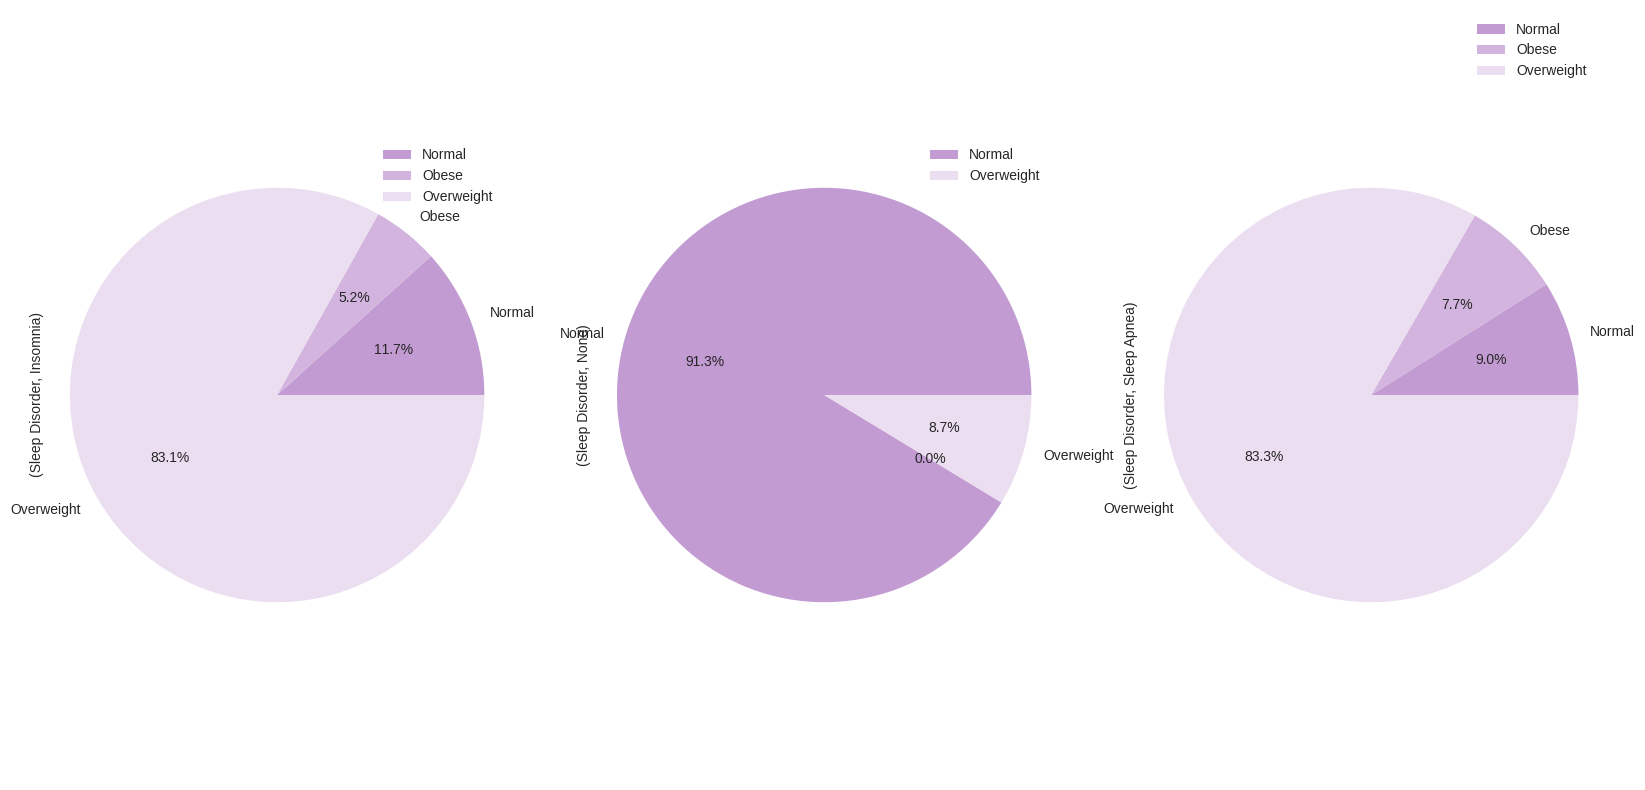

In [420]:
data.pivot_table(
    index='BMI Category',
    columns='Sleep Disorder',
    aggfunc={'Sleep Disorder':'count'}
).plot.pie(autopct ='%1.1f%%',
           subplots=True,figsize=(20,10),
           colors=['#C39BD3','#D2B4DE','#EBDEF0','#F4ECF7'])

plt.axis('equal')
plt.show()

It is evident that individuals classified under the BMI category 'overweight' exhibit the highest prevalence of both Sleep Apnea and Insomnia.
For those categorized as 'Normal' BMI, the occurrence of Insomnia is slightly higher than that of Sleep Apnea, although the difference is not significant.
Similarly, among individuals classified as 'Obese', the prevalence of Sleep Apnea is slightly higher than that of Insomnia, but the difference is not significant.

In [421]:
# The effect of Daily Steps on Sleep Disorder
data.pivot_table(
    index='Daily Steps',
    columns='Sleep Disorder',
    aggfunc={'Sleep Disorder':'count'}
).style.background_gradient(cmap='BuPu')

In [422]:
# The Effect of Daily Steps on Sleep
fig=px.ecdf(data,x='Daily Steps',
            color='Sleep Disorder',
            color_discrete_sequence=['white','#D8BFD8','#ADD8E6'])


fig.update_layout(title='<b>The Effect of Daily Steps on Sleep </b>..',
                 title_font={'size':25},
                 paper_bgcolor='#EBDEF0',
                 plot_bgcolor='#EBDEF0')


fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

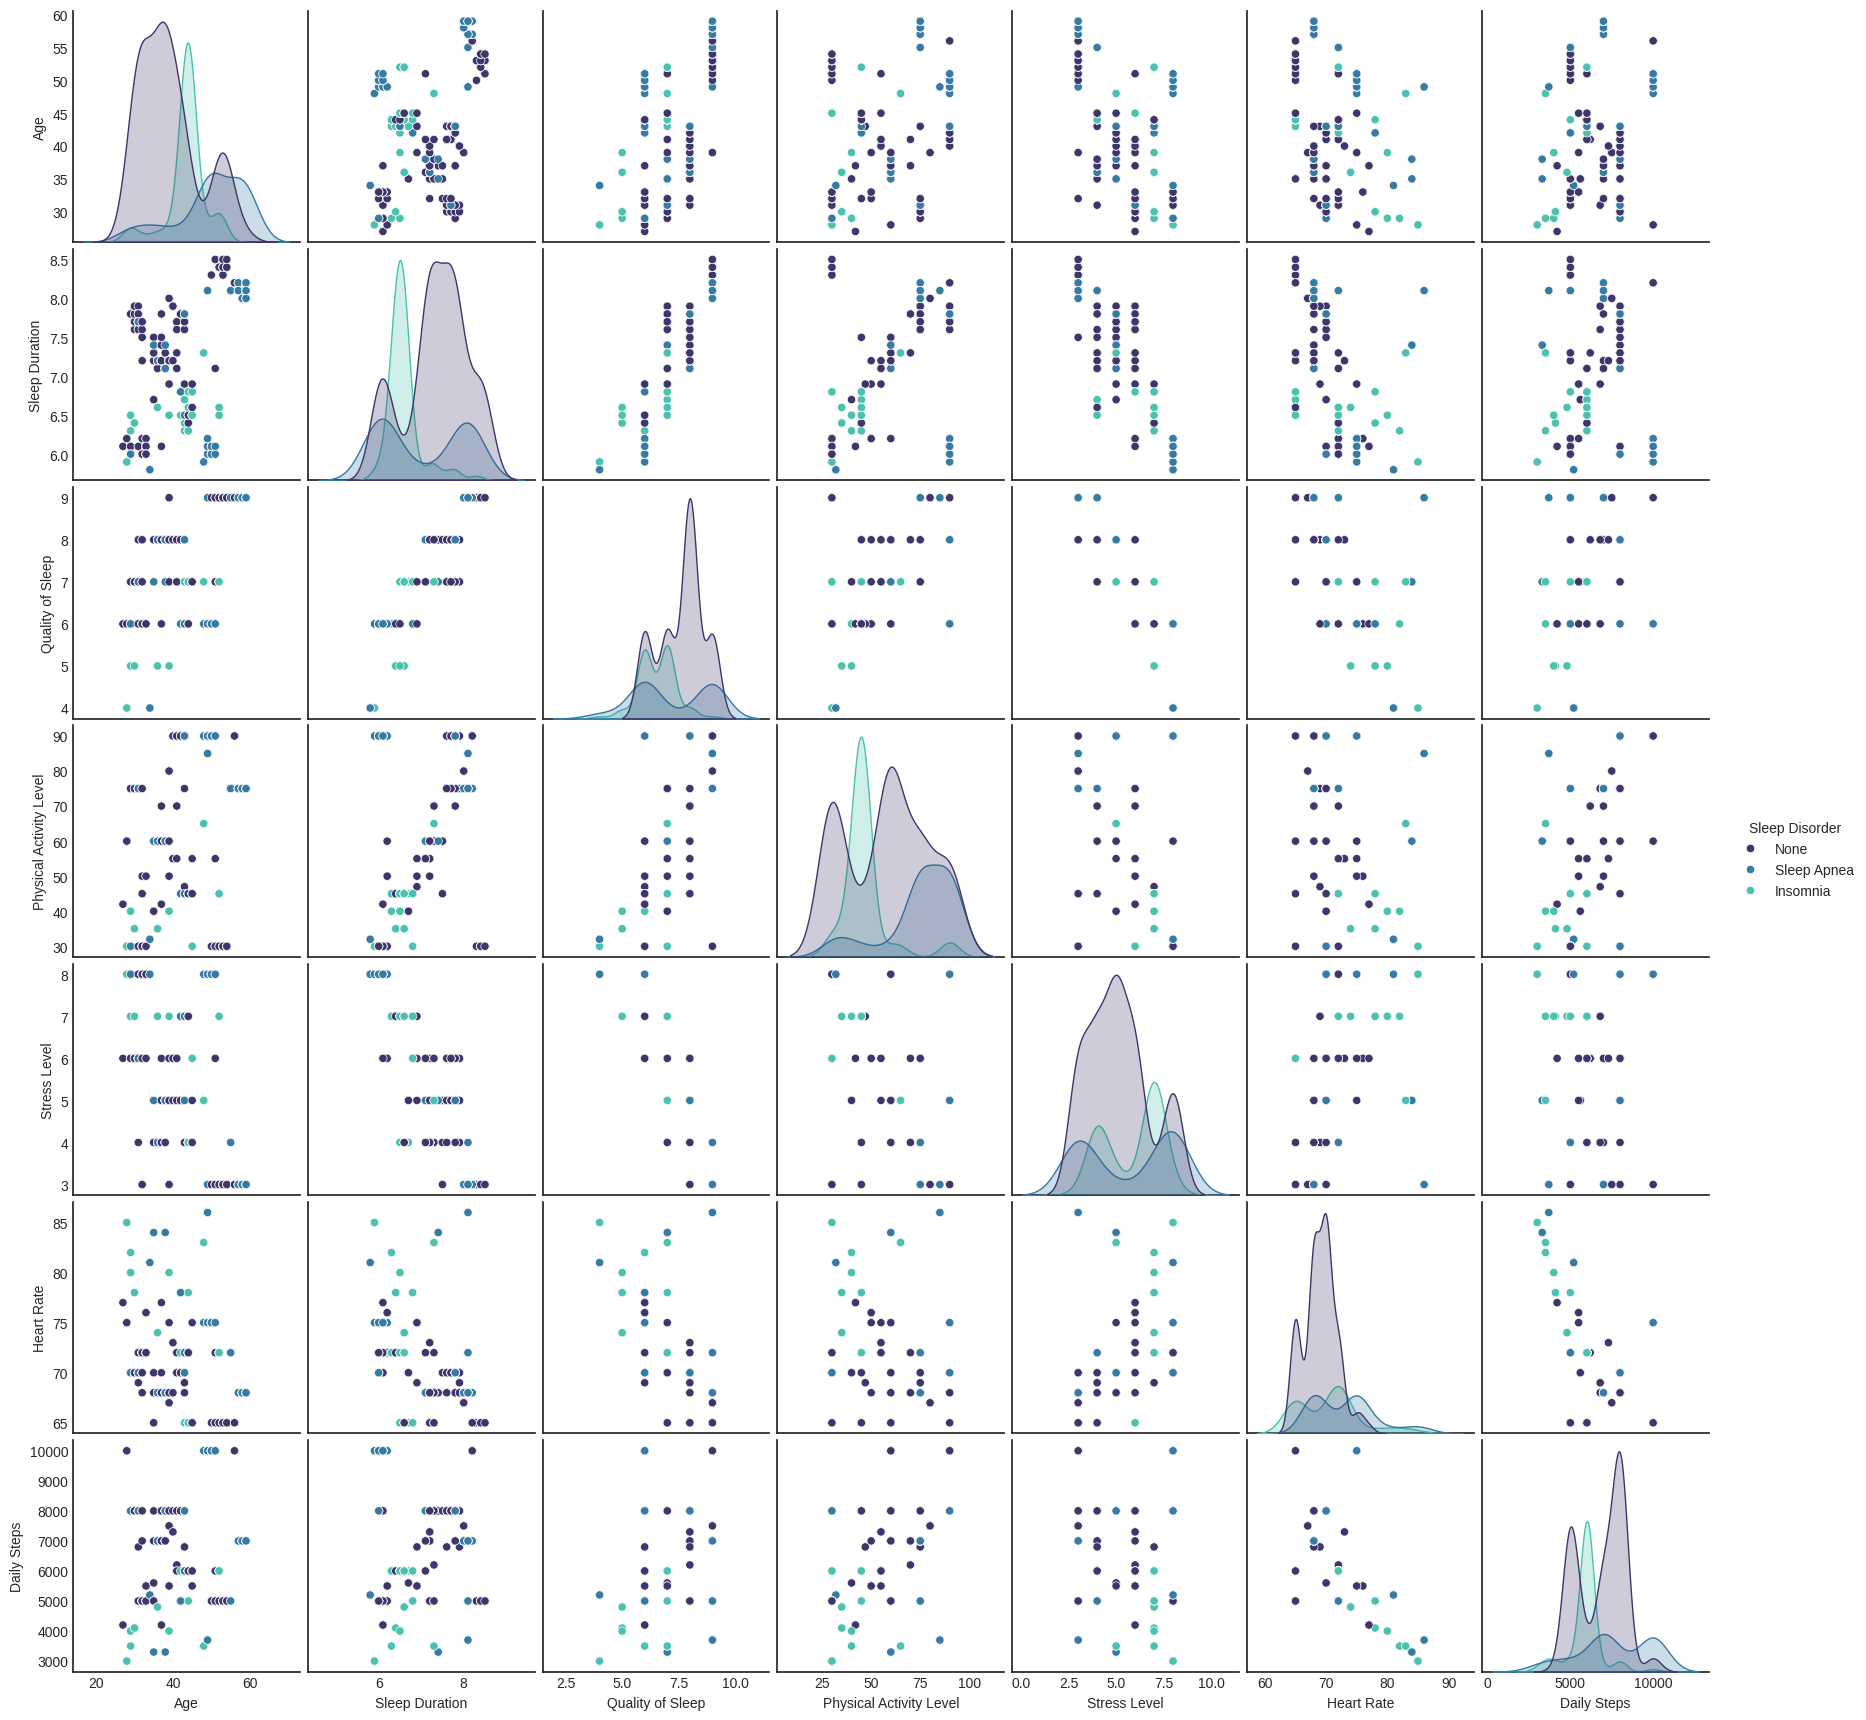

In [423]:
plt.style.use('seaborn-white')
sns.pairplot(data=data.drop('Person ID',axis=1),hue='Sleep Disorder',palette='mako')
plt.show()

EDA Conclusion:
It can be concluded that:
- More men tend to experience the sleep disorder insomnia, while women are more likely to experience sleep apnea.
- Sleep apnea is more prevalent around the age of 36, whereas insomnia is more common at around 56 years old.
- Teachers are more prone to sleep apnea, while lawyers are more likely to experience insomnia.
- Individuals with a sleep duration of 8.5 hours are susceptible to experiencing insomnia, whereas those with a sleep duration of 6.5 hours are prone to sleep apnea.
- A quality of sleep rating of 5.5 hours poses the highest risk of experiencing insomnia, while a rating of 4.8 hours poses the highest risk of experiencing sleep apnea.
- A Physical Activity Level (PAL) of 90 minutes per day is associated with a higher susceptibility to insomnia, while a PAL of 55 minutes per day is associated with a higher susceptibility to sleep apnea.
- A stress level rating of 5.5 on a scale is linked to a higher susceptibility to insomnia, while a rating of 4.5 is linked to a higher susceptibility to sleep apnea.
- Individuals with a normal BMI category are prone to experiencing both insomnia and sleep apnea.
- A heart rate of 68 beats per minute is associated with a higher susceptibility to insomnia, whereas a heart rate of 66.5 beats per minute is associated with a higher susceptibility to sleep apnea.
- A daily step count of 7700 steps per day is linked to a higher susceptibility to insomnia, while a count of 4000 steps per day is linked to a higher susceptibility to sleep apnea.
- Customers with lower total costs are less likely to.

# Preprocessing

In [424]:
from sklearn.preprocessing import LabelEncoder ,StandardScaler

In [425]:
# Ordinal Category=======
map_SO = {'None':0,
           'Sleep Apnea':1,
           'Insomnia':2}

# Mapping untuk mengubah nilai kategori menjadi nilai numerik
data["Sleep Disorder"].replace(map_SO, inplace=True)

In [426]:
label_encoder=LabelEncoder()

In [427]:
# Encoding
cat_cols=['Gender','Occupation','BMI Category']
for col in cat_cols:
    data[col] = label_encoder.fit_transform(data[col])

In [428]:
# changed the `Blood Pressure` column to integer format and separated the values into systolic and diastolic readings.
 # Split the 'Blood Pressure' column into two columns
data[['Systolic BP', 'Diastolic BP']] = data['Blood Pressure'].str.split('/', expand=True)

# Convert the new columns to numeric type
data[['Systolic BP', 'Diastolic BP']] = data[['Systolic BP', 'Diastolic BP']].apply(pd.to_numeric)

# Drop the original 'Blood Pressure' column
data = data.drop('Blood Pressure', axis=1)

In [429]:
data.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Heart Rate', 'Daily Steps', 'Sleep Disorder',
       'Systolic BP', 'Diastolic BP'],
      dtype='object')

In [430]:
data.drop("Person ID", axis = 1, inplace = True)

In [431]:
data.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic BP,Diastolic BP
0,1,27,9,6.1,6,42,6,2,77,4200,0,126,83
1,1,28,1,6.2,6,60,8,0,75,10000,0,125,80
2,1,28,1,6.2,6,60,8,0,75,10000,0,125,80
3,1,28,6,5.9,4,30,8,1,85,3000,1,140,90
4,1,28,6,5.9,4,30,8,1,85,3000,1,140,90


In [432]:
X = data.drop(columns='Sleep Disorder', axis=1).copy()
y = data[['Sleep Disorder']].copy()

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)

In [433]:
# calculate VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

X = add_constant(X_train)

vif_data = pd.DataFrame([vif(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns).reset_index()
vif_data.columns = ['X','vif_score']
vif_data = vif_data.loc[vif_data.X!='const']
vif_data

,X,vif_score
1,Gender,3.539179
2,Age,11.592635
3,Occupation,3.103999
4,Sleep Duration,7.995667
5,Quality of Sleep,18.811542
6,Physical Activity Level,5.575900
7,Stress Level,15.954151
8,BMI Category,9.535060
9,Heart Rate,3.586202
10,Daily Steps,6.513532


There are only 3 features that have a VIF score of no more than 4, namely Heart Rate, Gender and Occupation

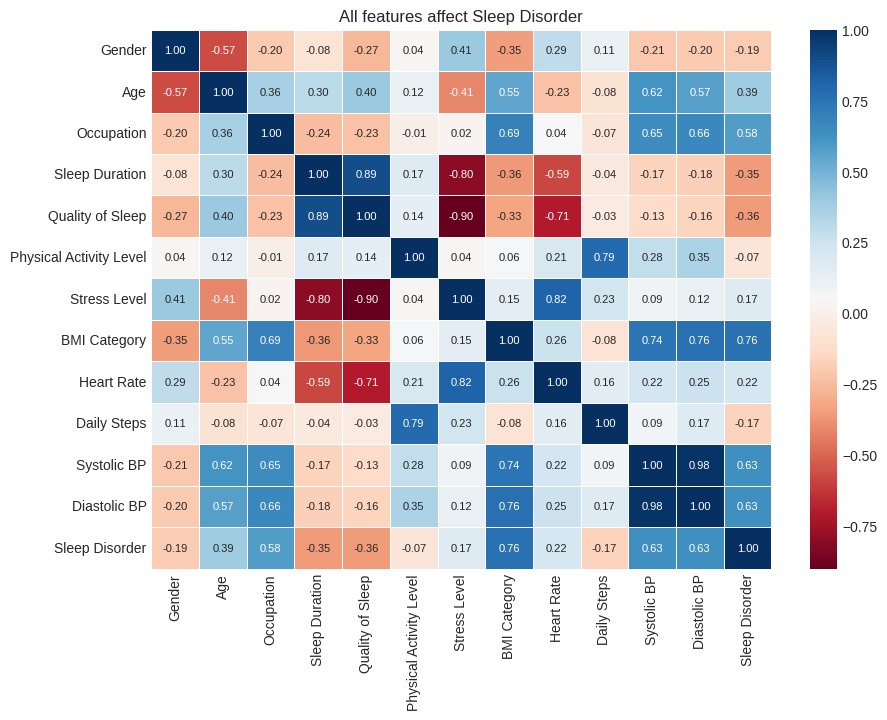

In [434]:
# heatmap correlation using Spearman
train = pd.concat([X_train, y_train], axis=1)
corr = train.corr(method='spearman')

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f', annot_kws={"size": 8}, linewidths=0.4, cmap='RdBu')
plt.title('All features affect Sleep Disorder')
plt.show()

Note : threshold : abc(corr) >= 0.8

It can be stated that there is a positive correlation between Quality of Sleep and Sleep Duration then positive coreelation between Stress Level and Heart Rate . And there is a negative correlation between Quality of Sleep, Sleep Duration with Stress Level. This is evident as higher sleep duration tends to coincide with better sleep duration and higher stress levels.
and there is a positive correlation between `Systolic BP` and `Diastolic BP`.

Next, we will remove interrelated correlations and identify the highest value that shows a positive correlation with sleep disorders!

we have decided to prioritize maintaining `Quality of Sleep`. Therefore, our focus is on reducing the `Stress Level` and `Sleep Duration`.
and we have decided to prioritize maintaining `Diastolic BP`. Therefore, our focus is on reducing the `Systolic BP`.

In [435]:
# drop redundant features
X_train = X_train.drop(columns=['Quality of Sleep','Stress Level', 'Systolic BP'])
X_test = X_test.drop(columns=['Quality of Sleep','Stress Level', 'Systolic BP'])

In [436]:
X = add_constant(X_train)

vif_data = pd.DataFrame([vif(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns).reset_index()
vif_data.columns = ['X','vif_score']
vif_data = vif_data.loc[vif_data.X!='const']
vif_data

,X,vif_score
1,Gender,1.719647
2,Age,4.631118
3,Occupation,2.480258
4,Sleep Duration,4.025371
5,Physical Activity Level,4.843201
6,BMI Category,5.182663
7,Heart Rate,2.263797
8,Daily Steps,3.943239
9,Diastolic BP,4.494031


There are still 5 features that have high value, namely Age, Sleep Duration, Physical Activity Level, BMI and Diastolic BP

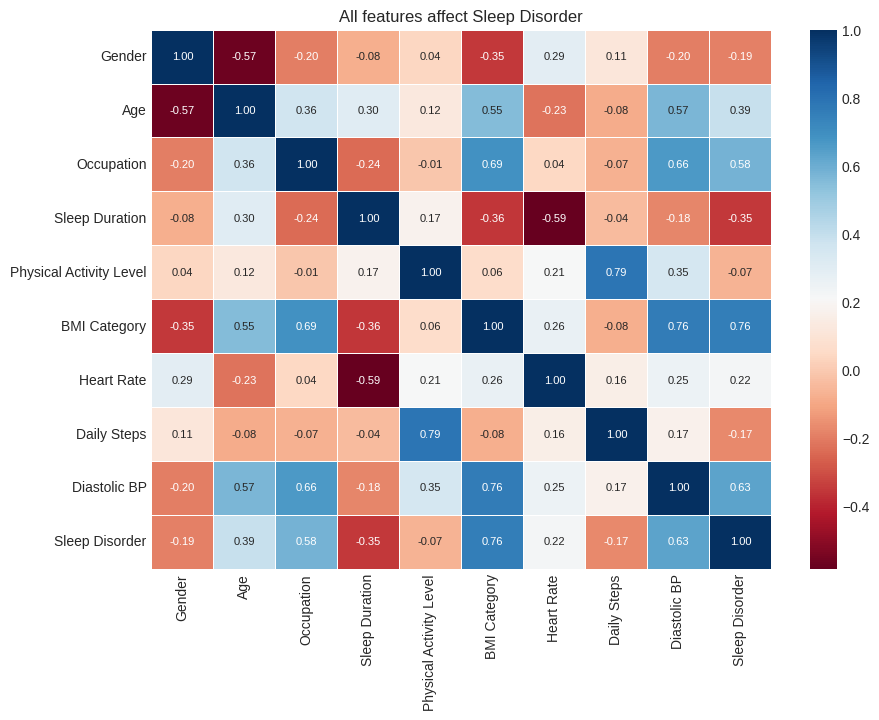

In [437]:
# heatmap correlation using Spearman
train = pd.concat([X_train, y_train], axis=1)
corr = train.corr(method='spearman')

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f', annot_kws={"size": 8}, linewidths=0.4, cmap='RdBu')
plt.title('All features affect Sleep Disorder')
plt.show()

# DATA MODELLING

In [438]:
# split the data
X = data.drop(['Sleep Duration','Stress Level', 'Systolic BP', 'Sleep Disorder'], axis=1).copy()
y = data["Sleep Disorder"].copy()

X_train, X_test, y_train, y_test = tts(X, y, stratify=y, test_size=0.2, random_state=42)

In [439]:
#baseline data
train_count = pd.Series(y_train).value_counts()
test_count = pd.Series(y_test).value_counts()

In [440]:
# it's important to choose the right metric then doing classification
data['Sleep Disorder'].value_counts()

0    219
1     78
2     77
Name: Sleep Disorder, dtype: int64

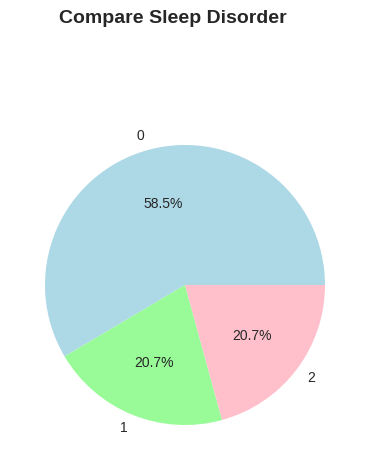

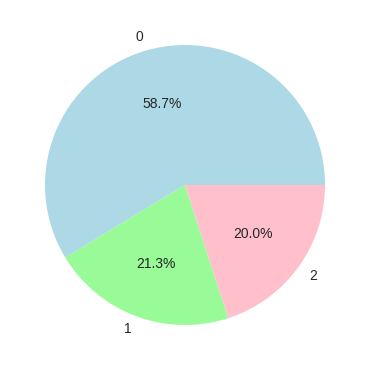

In [441]:
# Color for each section in the pie chart
colors = ['#ADD8E6', '#98FB98', '#FFC0CB', '#D8BFD8']

# Plot pie chart for training data
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.suptitle('Compare Sleep Disorder',fontsize=14,fontweight="bold")
plt.pie(train_count, labels=train_count.index, autopct='%1.1f%%', colors=colors)
plt.show()

# Plot pie chart for test data
plt.figure(figsize=(10,10))
plt.subplot(212)
plt.pie(test_count, labels=test_count.index, autopct='%1.1f%%', colors=colors)
plt.show()


The train and test results show no significant differences, so next step to proceed

** In this case, the metric I will use is the recall score, given that the target data is imbalanced. I opted for recall because my goal is to ensure that the model is sensitive to potential cases of sleep disorders, encompassing both Sleep Apnea and Insomnia.**

In [442]:
X_train.shape

(299, 9)

In [443]:
X_test.shape

(75, 9)

In [444]:
X_train.head()

,Gender,Age,Occupation,Quality of Sleep,Physical Activity Level,BMI Category,Heart Rate,Daily Steps,Diastolic BP
270,0,49,5,6,90,2,75,10000,95
200,1,43,7,6,45,2,72,6000,85
142,0,38,0,8,60,0,68,7000,75
329,0,53,2,9,30,0,65,5000,80
355,0,58,5,9,75,2,68,7000,95


In [445]:
missing_check(X_train)

,Missing_values,Percent of Missing (%),Numbers of Unique,Data type
Gender,0,0.0,2,int64
Age,0,0.0,31,int64
Occupation,0,0.0,10,int64
Quality of Sleep,0,0.0,6,int64
Physical Activity Level,0,0.0,15,int64
BMI Category,0,0.0,3,int64
Heart Rate,0,0.0,18,int64
Daily Steps,0,0.0,20,int64
Diastolic BP,0,0.0,17,int64


In [446]:
X_test.head()

,Gender,Age,Occupation,Quality of Sleep,Physical Activity Level,BMI Category,Heart Rate,Daily Steps,Diastolic BP
68,0,33,8,6,50,2,76,5500,85
58,1,32,1,6,30,0,72,5000,80
196,1,43,7,6,45,2,72,6000,85
191,1,43,7,6,45,2,72,6000,85
60,1,32,1,6,30,0,72,5000,80


In [447]:
missing_check(X_test)

,Missing_values,Percent of Missing (%),Numbers of Unique,Data type
Gender,0,0.0,2,int64
Age,0,0.0,26,int64
Occupation,0,0.0,10,int64
Quality of Sleep,0,0.0,5,int64
Physical Activity Level,0,0.0,10,int64
BMI Category,0,0.0,2,int64
Heart Rate,0,0.0,9,int64
Daily Steps,0,0.0,9,int64
Diastolic BP,0,0.0,9,int64


In [448]:
y_train

270    1
200    2
142    0
329    0
355    1
      ..
48     0
264    2
77     0
209    0
126    0
Name: Sleep Disorder, Length: 299, dtype: int64

In [449]:
def recall_scores(X_train, X_test, y_train, y_test, random_state=None):
    reg = LogisticRegression(multi_class='ovr', random_state=random_state)
    reg.fit(X_train, y_train)
    y_reg = reg.predict(X_test)

    svc = SVC(decision_function_shape='ovo', random_state=random_state)
    svc.fit(X_train, y_train)
    y_svc = svc.predict(X_test)

    dtc = DecisionTreeClassifier(random_state=random_state)
    dtc.fit(X_train, y_train)
    y_dtc = dtc.predict(X_test)

    rfc = RandomForestClassifier(random_state=random_state)
    rfc.fit(X_train, y_train)
    y_rfc = rfc.predict(X_test)

    abc = AdaBoostClassifier(random_state=random_state)
    abc.fit(X_train, y_train)
    y_abc = abc.predict(X_test)

    knc = KNeighborsClassifier()
    knc.fit(X_train, y_train)
    y_knc = knc.predict(X_test)

    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    y_gnb = gnb.predict(X_test)

    xgb = XGBClassifier()
    xgb.fit(X_train, y_train)
    y_xgb = xgb.predict(X_test)

    return (recall_score(y_test, y_reg, average='weighted'),
            recall_score(y_test, y_svc, average='weighted'),
            recall_score(y_test, y_dtc, average='weighted'),
            recall_score(y_test, y_rfc, average='weighted'),
            recall_score(y_test, y_abc, average='weighted'),
            recall_score(y_test, y_knc, average='weighted'),
            recall_score(y_test, y_gnb, average='weighted'),
            recall_score(y_test, y_xgb, average='weighted'))

In [450]:
scores = pd.DataFrame(columns=["REG", "SVC", "DTC", "RFC", "ABC", "KNC", "GNB","XGB"],
                      index=["Result"])

result = recall_scores(X_train, X_test, y_train, y_test)

scores.iloc[0, :] = result

print(scores)

             REG       SVC   DTC       RFC       ABC       KNC       GNB  \
Result  0.826667  0.626667  0.88  0.893333  0.853333  0.866667  0.866667   

             XGB  
Result  0.893333  


# Oversampling Method

In [451]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X = data.drop(['Sleep Duration','Stress Level', 'Systolic BP', 'Sleep Disorder'], axis=1)
y = data['Sleep Disorder']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

X_train_ovt, y_train_ovt = SMOTE().fit_resample(X_train, y_train)


In [452]:
def recall_scores(X_train_ovt, X_test, y_train_ovt, y_test, random_state=None):
    reg = LogisticRegression(multi_class='ovr', random_state=random_state)
    reg.fit(X_train_ovt, y_train_ovt)
    y_reg = reg.predict(X_test)

    svc = SVC(decision_function_shape='ovo', random_state=random_state)
    svc.fit(X_train_ovt, y_train_ovt)
    y_svc = svc.predict(X_test)

    dtc = DecisionTreeClassifier(random_state=random_state)
    dtc.fit(X_train_ovt, y_train_ovt)
    y_dtc = dtc.predict(X_test)

    rfc = RandomForestClassifier(random_state=random_state)
    rfc.fit(X_train_ovt, y_train_ovt)
    y_rfc = rfc.predict(X_test)

    abc = AdaBoostClassifier(random_state=random_state)
    abc.fit(X_train_ovt, y_train_ovt)
    y_abc = abc.predict(X_test)

    knc = KNeighborsClassifier()
    knc.fit(X_train_ovt, y_train_ovt)
    y_knc = knc.predict(X_test)

    gnb = GaussianNB()
    gnb.fit(X_train_ovt, y_train_ovt)
    y_gnb = gnb.predict(X_test)

    xgb = XGBClassifier()
    xgb.fit(X_train_ovt, y_train_ovt)
    y_xgb = xgb.predict(X_test)

    return (recall_score(y_test, y_reg, average='weighted'),
            recall_score(y_test, y_svc, average='weighted'),
            recall_score(y_test, y_dtc, average='weighted'),
            recall_score(y_test, y_rfc, average='weighted'),
            recall_score(y_test, y_abc, average='weighted'),
            recall_score(y_test, y_knc, average='weighted'),
            recall_score(y_test, y_gnb, average='weighted'),
            recall_score(y_test, y_xgb, average='weighted'))

In [453]:
scores = pd.DataFrame(columns=["REG", "SVC", "DTC", "RFC", "ABC", "KNC", "GNB","XGB"],
                      index=["Result"])

result = recall_scores(X_train_ovt, X_test, y_train_ovt, y_test)

scores.iloc[0, :] = result

print(scores)

             REG       SVC       DTC       RFC       ABC       KNC       GNB  \
Result  0.876106  0.495575  0.884956  0.884956  0.849558  0.884956  0.893805   

             XGB  
Result  0.893805  


# LogisticRegression

In [454]:
reg = LogisticRegression(multi_class='ovr', solver='liblinear')

param_grid_reg = {'C': [0.001, 0.01, 0.1, 1, 10],
                  'penalty': ['l1', 'l2']}

randomcv_reg = RandomizedSearchCV(reg, param_distributions=param_grid_reg, n_iter=5, cv=5, scoring='recall', random_state=42)
randomcv_reg.fit(X_train_ovt, y_train_ovt)


RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(multi_class='ovr',
                                                solver='liblinear'),
                   n_iter=5,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10],
                                        'penalty': ['l1', 'l2']},
                   random_state=42, scoring='recall')

In [455]:
randomcv_reg.best_params_

{'penalty': 'l1', 'C': 10}

In [456]:
reg = LogisticRegression(C=0.001, penalty='l1', solver='liblinear')
reg.fit(X_train, y_train)
new_y_reg = reg.predict(X_test)
recall_score(y_test, new_y_reg, average='weighted')

0.584070796460177

from the recall results, the model does not support this dataset

# SVC

In [457]:
from sklearn.preprocessing import StandardScaler

In [458]:
scaler = StandardScaler()
scaler.fit(X_train_ovt)

X_train_scaled = scaler.transform(X_train_ovt)
X_test_scaled = scaler.transform(X_test)

In [459]:
# hyperparameter tuning
svc = SVC(decision_function_shape='ovo')
param_grid_svc = {'C': [0.1, 1, 10],
                  'kernel': ['poly', 'rbf'],
                  'gamma': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5]
}

randomcv_svc = RandomizedSearchCV(SVC(probability=True), param_distributions=param_grid_svc, cv=5)
randomcv_svc.fit(X_train_scaled, y_train_ovt)

RandomizedSearchCV(cv=5, estimator=SVC(probability=True),
                   param_distributions={'C': [0.1, 1, 10],
                                        'gamma': [0.001, 0.005, 0.01, 0.05, 0.1,
                                                  0.5, 1, 5],
                                        'kernel': ['poly', 'rbf']})

In [460]:
# best_svc = grid_search.best_estimator_
randomcv_svc.best_params_

{'kernel': 'poly', 'gamma': 1, 'C': 1}

In [461]:
svc = SVC(C = 10, kernel = 'poly', gamma = 0.1)
svc.fit(X_train_scaled, y_train_ovt)
new_y_svc = svc.predict(X_test)
recall_score(y_test, new_y_svc, average='weighted')

0.584070796460177

from the recall results, the model does not support this dataset

# DecisionTreeClassifier

In [462]:
# hyperparameter tuning
dtc = DecisionTreeClassifier()
param_grid_dtc = {'max_depth': [10, 20, 30, 40],
                  'min_samples_split': [2, 5, 8, 10]}
randomcv_dtc = RandomizedSearchCV(dtc, param_distributions=param_grid_dtc, n_iter=5, cv=5, scoring='recall', random_state=42)
randomcv_dtc.fit(X_train_ovt, y_train_ovt)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=5,
                   param_distributions={'max_depth': [10, 20, 30, 40],
                                        'min_samples_split': [2, 5, 8, 10]},
                   random_state=42, scoring='recall')

In [463]:
randomcv_dtc.best_params_

{'min_samples_split': 2, 'max_depth': 10}

In [464]:
dtc = DecisionTreeClassifier(max_depth = 10, min_samples_split = 2)
dtc.fit(X_train_ovt, y_train_ovt)
new_y_dtc = dtc.predict(X_test)
recall_score(y_test, new_y_dtc, average='weighted')

0.9026548672566371

# RandomForestClassifier

In [465]:
# hyperparameter tuning
rfc = RandomForestClassifier()
param_grid_rfc = {'max_depth': [10, 20, 30, 40],
                  'min_samples_split': [2, 5, 8, 10]}

randomcv_rfc = RandomizedSearchCV(rfc, param_distributions=param_grid_rfc, n_iter=5, cv=5, scoring='recall', random_state=42)
randomcv_rfc.fit(X_train_ovt, y_train_ovt)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': [10, 20, 30, 40],
                                        'min_samples_split': [2, 5, 8, 10]},
                   random_state=42, scoring='recall')

In [466]:
randomcv_rfc.best_params_

{'min_samples_split': 2, 'max_depth': 10}

In [467]:
rfc = RandomForestClassifier(max_depth = 10, min_samples_split = 2)
rfc.fit(X_train_ovt, y_train_ovt)
new_y_rfc = rfc.predict(X_test)
recall_score(y_test, new_y_rfc, average='weighted')

0.8849557522123894

# AdaBoostClassifier

In [468]:
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV
abc = AdaBoostClassifier()
param_grid_abc = {'n_estimators': [50, 100, 150, 200],
                  'learning_rate': [0.1, 0.01, 0.001]}
randomcv_abc = RandomizedSearchCV(abc, param_distributions=param_grid_abc, n_iter=5, cv=5, scoring='recall', random_state=42)
randomcv_abc.fit(X_train_ovt, y_train_ovt)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(), n_iter=5,
                   param_distributions={'learning_rate': [0.1, 0.01, 0.001],
                                        'n_estimators': [50, 100, 150, 200]},
                   random_state=42, scoring='recall')

In [469]:
randomcv_abc.best_params_

{'n_estimators': 150, 'learning_rate': 0.001}

In [470]:
abc = AdaBoostClassifier(n_estimators = 150, learning_rate = 0.001)
abc.fit(X_train_ovt, y_train_ovt)
new_y_abc = abc.predict(X_test)
recall_score(y_test, new_y_abc, average='weighted')

0.8672566371681416

# K-NN Classification

In [471]:
# hyperparameter tuning
knc = KNeighborsClassifier()
param_grid_knc = {
    'n_neighbors': (2,3,4,5)
}

randomcv_knc = RandomizedSearchCV(knc, param_distributions=param_grid_knc, n_iter=5, cv=5, scoring='recall', random_state=42)
randomcv_knc.fit(X_train_ovt, y_train_ovt)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=5,
                   param_distributions={'n_neighbors': (2, 3, 4, 5)},
                   random_state=42, scoring='recall')

In [472]:
randomcv_knc.best_params_

{'n_neighbors': 2}

In [473]:
knc = KNeighborsClassifier(n_neighbors = 2)
knc.fit(X_train_ovt, y_train_ovt)
new_y_knc = knc.predict(X_test)
recall_score(y_test, new_y_knc, average='weighted')

0.8495575221238938

# GaussianNB

In [474]:
# hyperparameter tuning

gnb = GaussianNB()
param_grid_gnb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}


randomcv_gnb = RandomizedSearchCV(gnb, param_distributions=param_grid_gnb, n_iter=5, cv=5, scoring='recall', random_state=42)
randomcv_gnb.fit(X_train_ovt, y_train_ovt)

RandomizedSearchCV(cv=5, estimator=GaussianNB(), n_iter=5,
                   param_distributions={'var_smoothing': [1e-09, 1e-08, 1e-07,
                                                          1e-06]},
                   random_state=42, scoring='recall')

In [475]:
randomcv_gnb.best_params_

{'var_smoothing': 1e-09}

In [476]:
gnb = GaussianNB(var_smoothing = 1e-09)
gnb.fit(X_train_ovt, y_train_ovt)
new_y_gnb = gnb.predict(X_test)
recall_score(y_test, new_y_gnb, average='weighted')

0.8938053097345132

# XGBoost Classifier

In [477]:
xgb = XGBClassifier(multi_class='ovr', solver='liblinear')

param_grid_xgb = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7, 10],
    'n_estimators': [50, 100, 200]}

randomcv_xgb= RandomizedSearchCV(xgb, param_distributions=param_grid_xgb, n_iter=5, cv=5, scoring='recall', random_state=42)
randomcv_xgb.fit(X_train_ovt, y_train_ovt)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_class='ovr',
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=5,
                   param_distributions={'learning_rate': [0.1, 0.01, 0.001],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, scoring='recall')

In [478]:
randomcv_xgb.best_params_

{'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.001}

In [479]:
xgb = XGBClassifier(n_estimators = 200, max_depth = 10,learning_rate = 0.001)
xgb.fit(X_train_ovt, y_train_ovt)
new_y_xgb = xgb.predict(X_test)
recall_score(y_test, new_y_xgb, average='weighted')

0.8849557522123894

In [480]:
# Inisialisasi results_data sebagai dictionary kosong
results_data = {}

def add_result_to_data(results_data, model_name, params, recall, precision, f1, accuracy):
    # Menambahkan hasil ke dictionary results_data
    results_data[model_name] = {
        'Parameters': params,
        'Recall': recall,
        'Precision': precision,
        'F1 Score': f1,
        'Accuracy': accuracy
    }


add_result_to_data(results_data, "Logistic Regression", randomcv_reg.best_params_,
                    recall_score(y_test, new_y_reg, average='weighted'),
                    precision_score(y_test, new_y_reg, average='weighted'),
                    f1_score(y_test, new_y_reg, average='weighted'),
                    accuracy_score(y_test, new_y_reg))

add_result_to_data(results_data, "SVC", randomcv_svc.best_params_,
                    recall_score(y_test, new_y_svc, average='weighted'),
                    precision_score(y_test, new_y_svc, average='weighted'),
                    f1_score(y_test, new_y_svc, average='weighted'),
                    accuracy_score(y_test, new_y_svc))

add_result_to_data(results_data, "Decision Tree Classifier", randomcv_dtc.best_params_,
                    recall_score(y_test, new_y_dtc, average='weighted'),
                    precision_score(y_test, new_y_dtc, average='weighted'),
                    f1_score(y_test, new_y_dtc, average='weighted'),
                    accuracy_score(y_test, new_y_dtc))

add_result_to_data(results_data, "Random Forest Classifier", randomcv_rfc.best_params_,
                    recall_score(y_test, new_y_rfc, average='weighted'),
                    precision_score(y_test, new_y_rfc, average='weighted'),
                    f1_score(y_test, new_y_rfc, average='weighted'),
                    accuracy_score(y_test, new_y_rfc))

add_result_to_data(results_data, "Ada Boost Classifier", randomcv_abc.best_params_,
                    recall_score(y_test, new_y_abc, average='weighted'),
                    precision_score(y_test, new_y_abc, average='weighted'),
                    f1_score(y_test, new_y_abc, average='weighted'),
                    accuracy_score(y_test, new_y_abc))

add_result_to_data(results_data, "KNeighbors Classifier", randomcv_knc.best_params_,
                    recall_score(y_test, new_y_knc, average='weighted'),
                    precision_score(y_test, new_y_knc, average='weighted'),
                    f1_score(y_test, new_y_knc, average='weighted'),
                    accuracy_score(y_test, new_y_knc))

add_result_to_data(results_data, "GaussianNB", randomcv_gnb.best_params_,
                    recall_score(y_test, new_y_gnb, average='weighted'),
                    precision_score(y_test, new_y_gnb, average='weighted'),
                    f1_score(y_test, new_y_gnb, average='weighted'),
                    accuracy_score(y_test, new_y_gnb))

add_result_to_data(results_data, "XGBClassifier", randomcv_xgb.best_params_,
                    recall_score(y_test, new_y_xgb, average='weighted'),
                    precision_score(y_test, new_y_xgb, average='weighted'),
                    f1_score(y_test, new_y_xgb, average='weighted'),
                    accuracy_score(y_test, new_y_xgb))

# Konversi dictionary menjadi DataFrame pandas
results_df = pd.DataFrame(results_data).transpose()

# Urutkan berdasarkan nilai recall secara menurun
sorted_results_df = results_df.sort_values(by='Recall', ascending=False)

# Cetak hasil
print(sorted_results_df)

                                                                 Parameters  \
Decision Tree Classifier          {'min_samples_split': 2, 'max_depth': 10}   
GaussianNB                                         {'var_smoothing': 1e-09}   
Random Forest Classifier          {'min_samples_split': 2, 'max_depth': 10}   
XGBClassifier             {'n_estimators': 200, 'max_depth': 10, 'learni...   
Ada Boost Classifier          {'n_estimators': 150, 'learning_rate': 0.001}   
KNeighbors Classifier                                    {'n_neighbors': 2}   
Logistic Regression                              {'penalty': 'l1', 'C': 10}   
SVC                                  {'kernel': 'poly', 'gamma': 1, 'C': 1}   

                            Recall Precision  F1 Score  Accuracy  
Decision Tree Classifier  0.902655  0.904516  0.901643  0.902655  
GaussianNB                0.893805  0.892989  0.893286  0.893805  
Random Forest Classifier  0.884956  0.889785  0.885136  0.884956  
XGBClassifier       

Now in our Decision Tree Classifier model we had a very big improvement when compared to Logistic Regression, SVC, RFC, ABC, KNC, GNB and XGB, we had 88.4% recall score with the model being able to predict the 3 classes very well.

# Evaluation For Data Test Decision Tree Classifier



In [481]:
# classification report
target_names = ['None', 'Sleep Apnea', 'Insomnia']
y_train_pred = randomcv_dtc.best_estimator_.predict(X_train_ovt)
y_test_pred = randomcv_dtc.best_estimator_.predict(X_test)

print("TRAIN:")
print(classification_report(y_train_ovt, y_train_pred, target_names=target_names))
print("TEST:")
print(classification_report(y_test, y_test_pred, target_names=target_names))



TRAIN:
              precision    recall  f1-score   support

        None       0.96      0.95      0.95       153
 Sleep Apnea       0.96      0.97      0.97       153
    Insomnia       0.97      0.97      0.97       153

    accuracy                           0.96       459
   macro avg       0.96      0.96      0.96       459
weighted avg       0.96      0.96      0.96       459

TEST:
              precision    recall  f1-score   support

        None       0.91      0.92      0.92        66
 Sleep Apnea       0.84      0.88      0.86        24
    Insomnia       0.86      0.78      0.82        23

    accuracy                           0.88       113
   macro avg       0.87      0.86      0.86       113
weighted avg       0.88      0.88      0.88       113



In [482]:
confusion_matrix(y_test,y_test_pred)

array([[61,  3,  2],
       [ 2, 21,  1],
       [ 4,  1, 18]])

In [483]:
from sklearn.metrics import roc_auc_score

# Initialize the Gaussian NB
dtc = DecisionTreeClassifier()

# Fit the GradientBoostingClassifier with training data
dtc.fit(X_train_ovt, y_train_ovt)

# Now you can use predict_proba() method
y_probabilities = dtc.predict_proba(X_test)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_probabilities, multi_class='ovo')
print("AUC-ROC Score:", roc_auc)



AUC-ROC Score: 0.8658848448250622


In [484]:
y_probabilities

array([[1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.04347826, 0.95652174, 0.        ],
       [0.04347826, 0.95652174, 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.04347826, 0.95652174, 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [0.91666667, 0.08333333, 0.        ],
       [0.        , 1.        , 0.        ],
       [0.04761905, 0.95238095, 0.        ],
       [0.

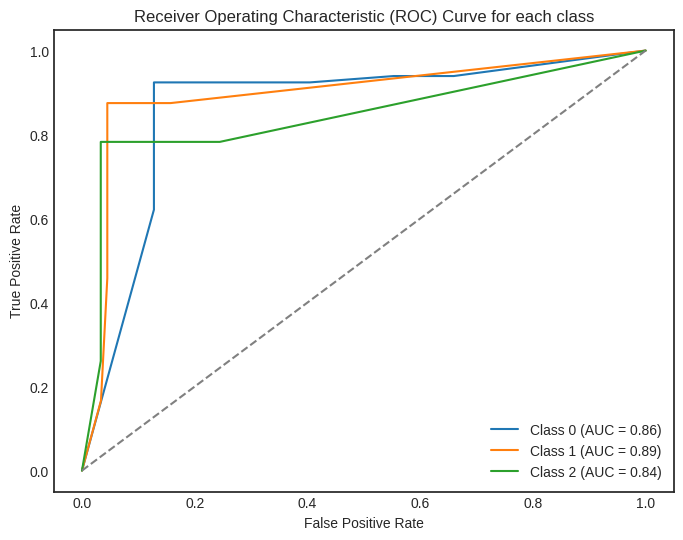

In [485]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Menghitung kurva ROC untuk setiap kelas
plt.figure(figsize=(8, 6))
for i in range(len(dtc.classes_)):
    fpr, tpr, _ = roc_curve(y_test == i, y_probabilities[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Plot garis acak
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Menambahkan label dan judul
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for each class')
plt.legend()
plt.show()


ROC : Grafik diatas merupakan grafik yang memplot tingkat positive benar (TPR atau sensitivitas) terhadap tingkat positif salah. ROC dihitung dengan mengubah decision threshold(default0.5) dan memplot TPR dan FPR.
AUC : mengacu pada area dibawah kurva ROC

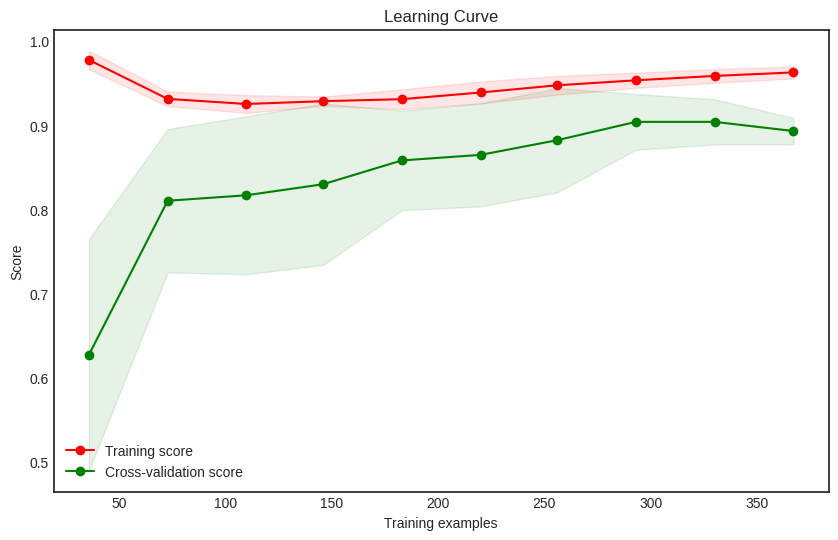

In [486]:
from sklearn.model_selection import learning_curve

# model
dtc = DecisionTreeClassifier()

# Calculate Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    dtc, X_train_ovt, y_train_ovt, train_sizes=np.linspace(0.1, 1.0, 10), cv=5
)

# Hitung rata-rata dan simpangan baku dari skor pelatihan dan pengujian
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot kurva belajar
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()


In [487]:
# Hitung rata-rata dan simpangan baku dari skor pelatihan dan pengujian
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

print(f'Mean Train Scores: {train_scores_mean}')
print(f'Std Train Scores: {train_scores_std}')
print(f'Mean Test Scores: {test_scores_mean}')
print(f'Std Test Scores: {test_scores_std}')

Mean Train Scores: [0.97777778 0.93150685 0.92545455 0.92876712 0.93114754 0.93909091
 0.94765625 0.95358362 0.95878788 0.96294278]
Std Train Scores: [0.01111111 0.00866377 0.01060173 0.00547945 0.01177085 0.01304791
 0.01121305 0.00905563 0.0080403  0.0072297 ]
Mean Test Scores: [0.62735308 0.81043956 0.81698519 0.83005256 0.8583612  0.8649785
 0.88241758 0.90420449 0.90420449 0.89328715]
Std Test Scores: [0.13750005 0.08523689 0.09386959 0.09591927 0.05920205 0.06123381
 0.06193056 0.03312427 0.02681689 0.01574377]


- Precision: Precision is the ratio of correctly predicted positive observations to the total predicted positives. It is a measure of the accuracy of the positive predictions. In the context of the report you provided:

    Precision for None: 0.91 (91% of the predicted None instances were correct)

    Precision for Sleep Apnea: 0.84 (84% of the predicted Sleep Apnea instances were correct)

    Precision for Insomnia: 0.90 (90% of the predicted Insomnia instances were correct)

- Recall (Sensitivity): Recall is the ratio of correctly predicted positive observations to the all observations in the actual class. It is a measure of the ability of the classifier to capture all the possible positive instances. In the context of the report:

    Recall for None: 0.94 (92% of actual Nones are almost completely captured by the GBC Model)
    
    Recall for Sleep Apnea: 0.88 (92% of the actual Sleep Apnea instances were captured by the model)

    Recall for Insomnia: 0.78 (78% of the actual Insomnia instances were captured by the model)

- F1-Score: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. In the context of the report:

    F1-score for None: 0.93
    
    F1-score for Sleep Apnea: 0.86

    F1-score for Insomnia: 0.84

- Support: The number of actual occurrences of the class in the specified dataset.

    Support for None: 66
    Support for Sleep Apnea: 24
    Support for Insomnia: 23

- Accuracy: Overall accuracy of the model, which is the ratio of correctly predicted observations to the total observations.

    Accuracy: 0.89 (89%)

- Macro Avg (Macro Average): The average precision, recall, and F1-score across all classes. It treats all classes equally.

    Macro Avg Precision: 0.88

    Macro Avg Recall: 0.87

    Macro Avg F1-Score: 0.87

- Weighted Avg (Weighted Average): The weighted average precision, recall, and F1-score, taking into account the number of instances in each class. It is useful when there is an imbalance in the number of instances in different classes.

    Weighted Avg Precision: 0.89

    Weighted Avg Recall: 0.89

    Weighted Avg F1-Score: 0.89

- The overall F1-Score, often referred to as the "weighted average F1-Score" in the context of a multi-class classification problem, is provided in the "weighted avg" row of the classification report.

    The weighted average F1-Score is 0.89. This metric takes into account both the F1-Score and the number of instances in each class, providing a balanced measure of the model's overall performance across all classes. It's a useful metric when dealing with imbalanced datasets, where the number of instances in each class may vary significantly.

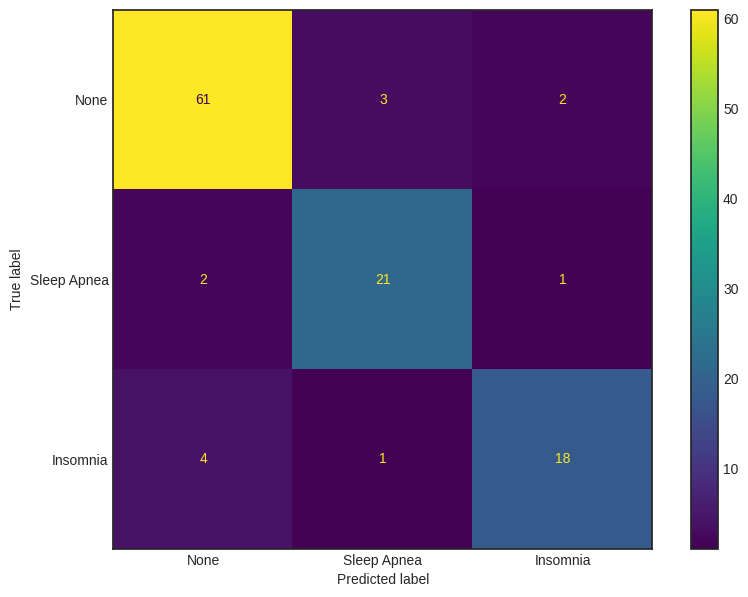

In [488]:
# plotting confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = randomcv_dtc.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=randomcv_dtc.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=["None", "Sleep Apnea", "Insomnia"])
disp.plot(ax=ax)
plt.show()

We can see that a 3 x 3 confusion matrix is generated:

*Row 1, we see that out of the 66 total (62+3+1) None data points, 62 of them were predicted correctly. 3 test points were incorrectly classified as Sleep Apnea and 1 test point was incorrectly classified as Insomnia.

*Row 2, we see that out of 24 total (21+2+1) Sleep Apnea data points, 21 of them were predicted correctly. 2 test points were incorrectly classified as None and 1 test point was incorrectly classified as Insomnia.

*Row 3, we see that out of the 23 total (18+4+1) Insomnia data points, 18 of them were predicted correctly. 4 test points were incorrectly classified as None and 1 test point was incorrectly classified as Sleep Apnea.

Let's see how to calculate the metric for None.

Number of samples including None = 62 + 3 + 1 = 66

True positive (samples that include None, predicted as None) = 62

False positives (samples classified as None, but not None) = 2 + 4 = 6

False negative = 3 + 1 = 4

Precision = True positives / (True positives + False positives)

Precision = 62/(62+6) = 0.91

Recall = True positives / (True positives + False negative)

Recall = = 62/(62+4) = 0.94

Likewise with Sleep Apnea and Insomnia:
* Number of samples including Sleep Apnea = 21 + 2 + 1 = 24

True positive (samples that include Sleep Apnea, predicted as Sleep Apnea) = 21

False positives (samples classified as Sleep Apnea, but not Sleep Apnea) = 3 + 1 = 4
False negative = 2 + 1 = 3

Precision = True positives / (True positives + False positives)

Precision = 21/(21+4) = 0.84

Recall = True positives / (True positives + False negative)

Recall = = 21/(21+3) = 0.88

* Number of samples including Insomnia = 18 + 4 + 1 = 23

True positive (samples that include insomnia, predicted as insomnia) = 18

False positives (samples classified as Insomniac, but not Insomniac) = 1 + 1 = 2

False Negative = 4 + 1 = 5
Precision = True positives / (True positives + False positives)

Precision = 18/(18+2) = 0.90

Recall = True positives / (True positives + False negative)

Recall = = 18/(18+5) = 0.78

** So, For None, Sleep Apnea and Insomnia, we can verify that the precision,recall value is the same as we had calculated with a small approximation.**

# SAVE MODEL

In [489]:
import pickle

pickle.dump(dtc,open('DecisionTreeClassifier.pkl','wb'))

# Intrepretable

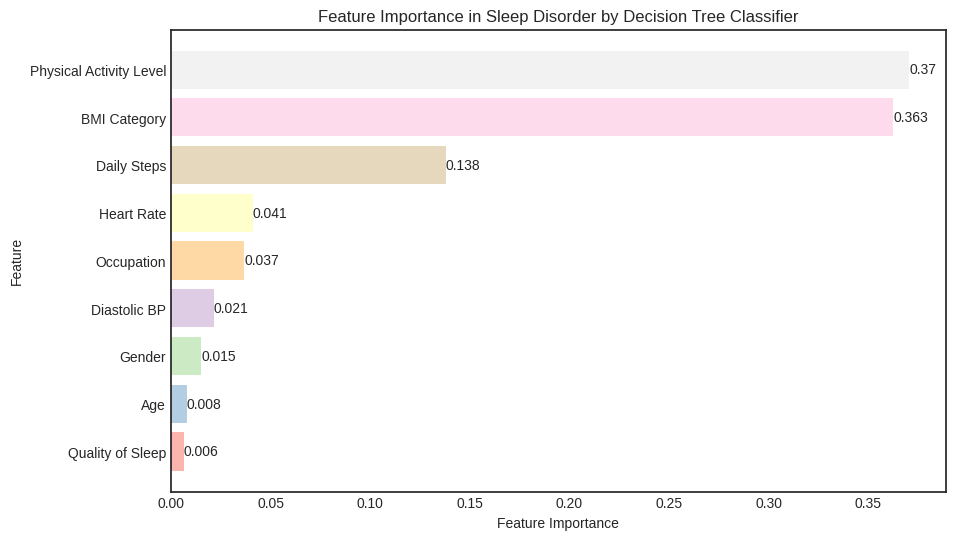

In [490]:
# feature importance
dtc = DecisionTreeClassifier()
dtc.fit(X_train_ovt, y_train_ovt)

# get the feature importance model
feature_importance = dtc.feature_importances_

# get the name feature from data
feature_names = X.columns

# Sort feature importance
sorted_idx = np.argsort(feature_importance)
sorted_feature_importance = feature_importance[sorted_idx]
sorted_feature_names = feature_names[sorted_idx]

# color
colors = plt.cm.Pastel1(np.linspace(0, 1, len(sorted_feature_importance)))

# feature importance visualization
plt.figure(figsize=(10, 6))
bars = plt.barh(range(len(sorted_feature_importance)), sorted_feature_importance, color=colors, align='center')

for bar, imp in zip(bars, sorted_feature_importance):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, round(imp, 3), va='center')

plt.yticks(range(len(sorted_feature_importance)), sorted_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Sleep Disorder by Decision Tree Classifier')
plt.show()


In [491]:
pip install shap

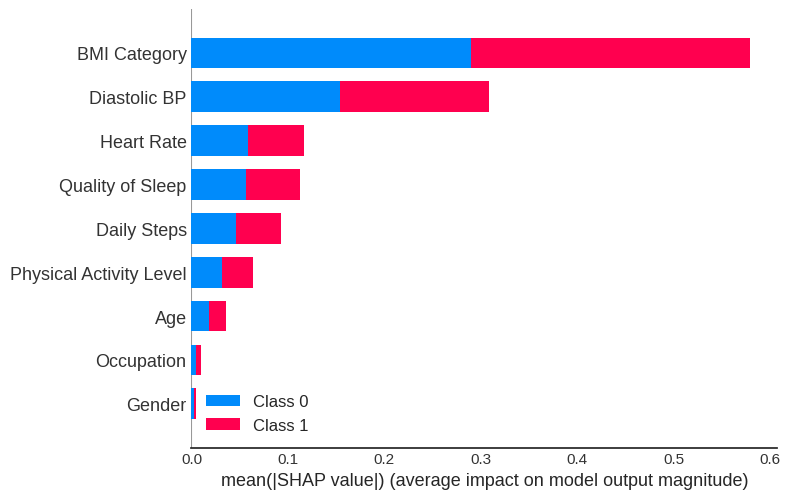

In [492]:
import shap
from sklearn.multiclass import OneVsRestClassifier

# Initialize GradientBoostingClassifier
dtc = DecisionTreeClassifier()

# Initialize OneVsRestClassifier with Decision Tree Classifier
ovr_dtc = OneVsRestClassifier(dtc)

# Train the model on the trained data
ovr_dtc.fit(X_train_ovt, y_train_ovt)

# Create a TreeExplainer object
explainer = shap.TreeExplainer(ovr_dtc.estimators_[0]) # Get the first model from OneVsRestClassifier

# Calculate SHAP values for test data
shap_values = explainer.shap_values(X_test)

# Visualize SHAP values
shap.summary_plot(shap_values, X_test)


## So the insights obtained from Sleep Disorder data are:


1. are older (45 years and above).
2. work in the fields of nursing, sales, or teaching.
3. have a sleep duration ranging from 5.9 to 8.3 hours.
4. have a total sleep duration of less than 1000 hours.
5. engage in physical activity levels around 60-90 minutes, making them susceptible to Sleep Apnea, or around 45 minutes, making them susceptible to Insomnia.
6. experience stress levels between 3-4 and 7-8.
7. fall into the overweight BMI category.
8. have a heart rate above the normal range of 80.
9. take fewer than 10000 steps per day.
10. have high blood pressure, with readings above 120/80.

# Recomendation:

* The company urges productive workers aged 30-60 years to remain alert to sleep disorders through:
1. Health campaigns that emphasize the importance of well-being.
2. Health initiatives that target sleep patterns, especially in age groups that are vulnerable to sleep disorders.
3. Hold sports together, such as small to large scale running.

* The company appreciates and appreciates workers who actively lead a healthy lifestyle, including weight management and consuming nutritious food.

* Maintaining good health among workers makes a significant contribution to a company's ability to achieve its goals.

* Collaboration between National Health authorities and companies can facilitate the implementation of Work-from-Home (WFH) or Work-from-Anywhere (WFA) systems, thereby encouraging a healthier work-life balance for employees.

* By managing their activities effectively, residents/workers have the potential to reduce the prevalence of sleep disorders such as Sleep Apnea and Insomnia by up to 40% compared to previous years.

* Overcoming sleep disorders can be done if individuals realize the importance of health, not only for themselves but also for their families and other people.

source:

https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings

https://www.ncoa.org/adviser/sleep/sleep-apnea-statistics/

https://www.cdc.gov/physicalactivity/basics/adults/index.htm

https://medium.datadriveninvestor.com/the-basics-of-decision-trees-e5837cc2aba7

https://medium.com/analytics-vidhya/classification-in-decision-tree-a-step-by-step-cart-classification-and-regression-tree-8e5f5228b11e

https://www.mayoclinic.org/healthy-lifestyle/fitness/expert-answers/heart-rate/faq-20057979#:~:text=A%20normal%20resting%20heart%20rate%20for%20adults%20ranges%20from%2060,to%2040%20beats%20per%20minute.


# **Thankyou**